In [1]:
# Loading necessary libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Loading the dataset
data = pd.read_csv('StudentsPerformance.csv')

## Step 1 - Understanding the Data

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
# What is the number of rows and columns?
data.shape

(1000, 8)

### Observation
There are 1000 rows and 8 columns. 

#### Que. What are the mean, median, max, and min scores in each course? Also, what are standard deviations, total counts, etc of the courses?

In [6]:
# Let's see few main statistics related with numerical features of data
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Ques. What are the different columns and their characteristics?

In [7]:
# Let's see all the columns names
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
# Let's see inside each columns and their big pictures
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Observation
There are no null values. Only 3 columns are numerical and others are categorical.

In [9]:
# Let's see the unique values in categorical features
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [10]:
type(data['gender'].unique())

numpy.ndarray

In [11]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [12]:
# To see the no. of unique values in all columns
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

## Step 2 -  Cleaning the Data

### 2.1 Missing Values

In [13]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Observation
There are no missing values.

### 2.2 Outliers

In [14]:
# There are no outliers

In [15]:
student = data

## Step 3 - Relationship analysis

#### Ques. Which features are important and which are not?

In [16]:
# Our goal is to analyse student's performance

In [17]:
# Let's see the correlation matrix
correlation = student.corr()
correlation

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [18]:
type(correlation)

pandas.core.frame.DataFrame

<AxesSubplot:>

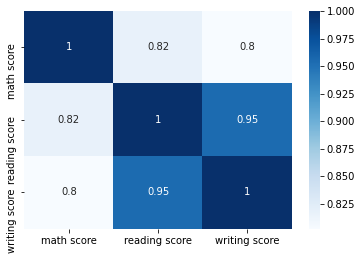

In [19]:
# To visulaize the correlation matrix
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels=correlation.columns
           , annot=True, cmap = 'Blues')

### Observation
There is very high correlation between marks (which should be in general). However, the above visualization doesn't help us to find the relationships between categorical variables and others.

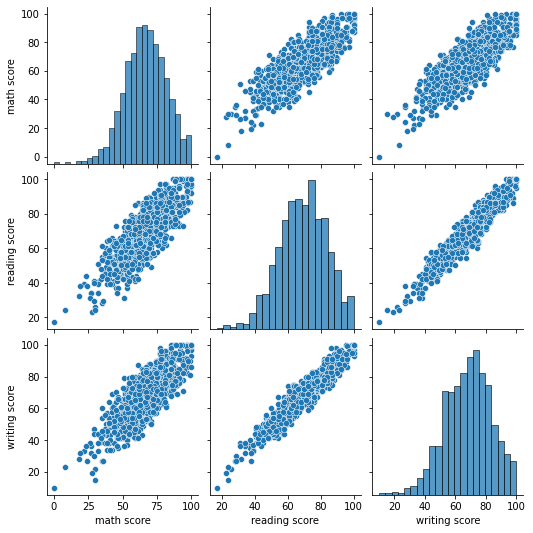

In [20]:
sns.pairplot(student)

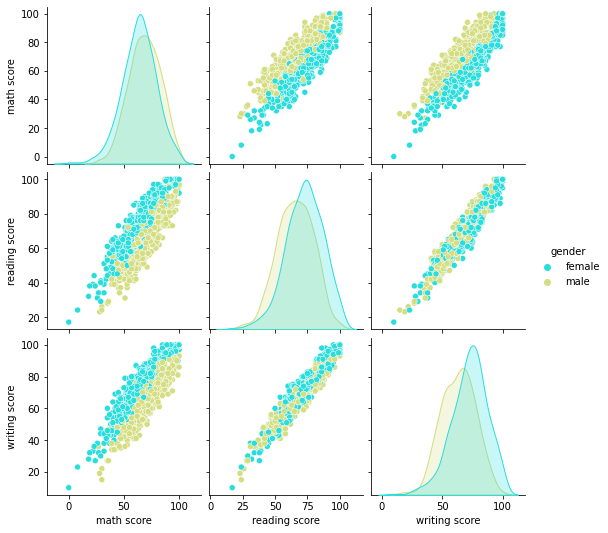

In [21]:
sns.pairplot(student, hue = 'gender', palette='rainbow')

### Observations
1. For the same math score, Females have higher score in reading as well as writing than males
2. For the same reading score, 
    2.1. Males have higher reading score than females
    2.2. Writing scores are similar
3. For the same wrting score,
    3.1. Males have higher math score than females
    3.2. Reading scores are similar
    
So, there is relationship between gender and scores.

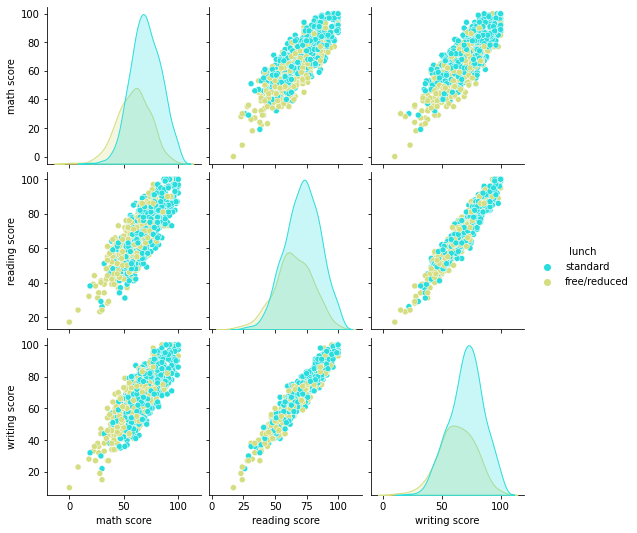

In [22]:
sns.pairplot(student, hue = 'lunch', palette='rainbow')

### Observation
There is some relationships between lunch and scores. Those who have taken standard lunch have actually scored higher as compared to those who haven't.

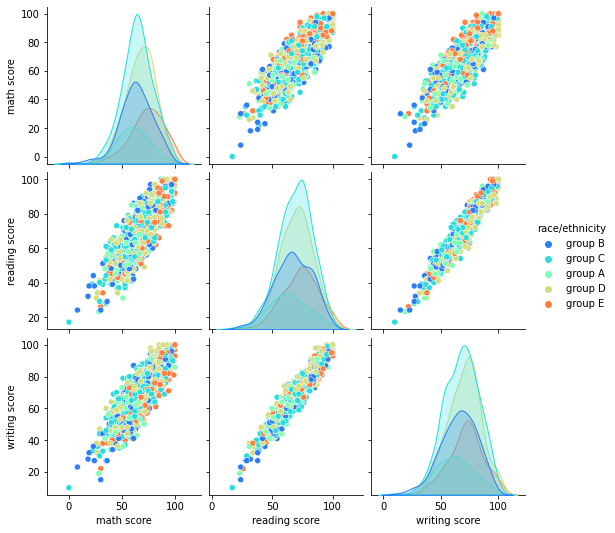

In [23]:
sns.pairplot(student, hue = 'race/ethnicity', palette='rainbow')

### Observation
There is no specific relationships between race/ethinicity and scores. So, that means we can drop it in future.

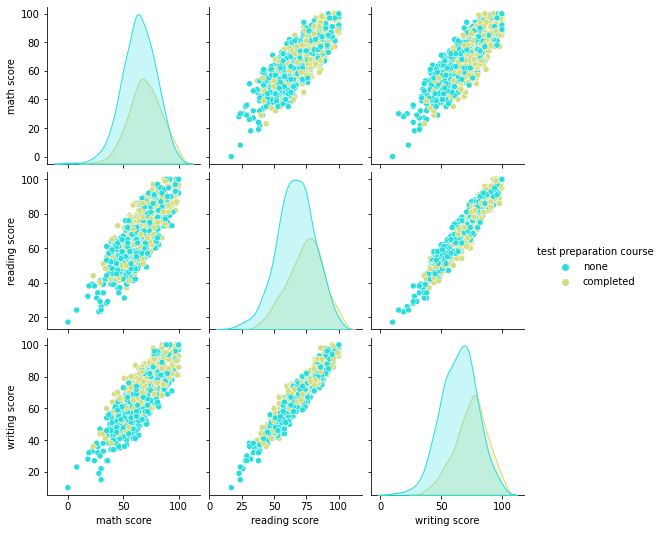

In [24]:
sns.pairplot(student, hue = 'test preparation course', palette='rainbow')

### Observation
There is some relationships between test preparation course and scores. Also, that looks reasonable because the ones who have completed the test preparation course should be scoring higher marks than those who haven't. 

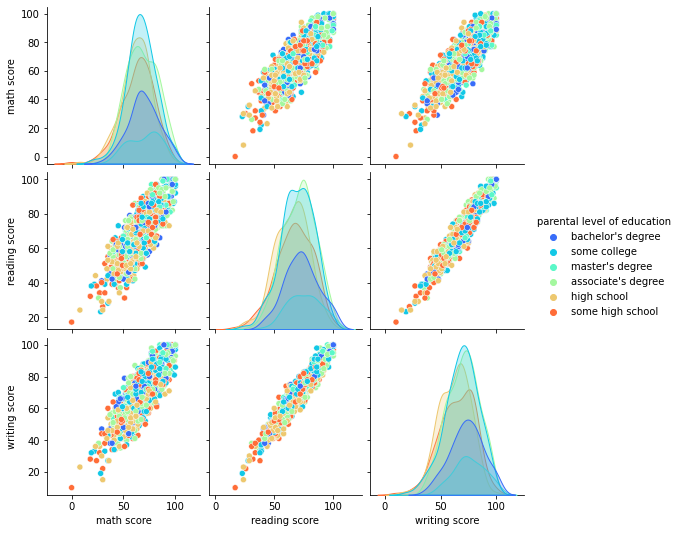

In [25]:
sns.pairplot(student, hue = 'parental level of education', palette='rainbow')

### Observation
There is no specific relationships between parental leval of education and scores. So, that means we can drop it in future.

#### In the dataset, race/ethnicity and parental level of education don't play any important roles. So, we can simply drop them

In [26]:
student_final = student.drop(['race/ethnicity', 'parental level of education'], axis = 1)
student_final.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,none,72,72,74
1,female,standard,completed,69,90,88
2,female,standard,none,90,95,93
3,male,free/reduced,none,47,57,44
4,male,standard,none,76,78,75
